### Initial Decision Tree Regressor Exploration

In [1]:
%pylab inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.DataFrame.from_csv('cap-data/data-clean-round1/data_v2.csv', index_col= 0, encoding = 'utf-8')
nweight = pd.DataFrame.from_csv('cap-data/data-clean-round1/nweight.csv', index_col= 0, encoding = 'utf-8')
pc = pd.DataFrame.from_csv('cap-data/data-clean-round1/pc_v2.csv', index_col= 0, encoding = 'utf-8')
kwh = pd.DataFrame.from_csv('cap-data/data-clean-round1/kwh.csv', index_col= 0, encoding = 'utf-8')
pc_cat = pd.DataFrame.from_csv('cap-data/data-clean-round1/pc_cat_vars.csv', index_col= 0, encoding = 'utf-8')

### Splitting Up Dataset for kfold cross validation


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
cat_data = data.filter(items = pc_cat['Variable Name'])
cat_data['NWEIGHT'] = nweight

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cat_data, kwh, test_size=0.4)

In [6]:
nwgt_train = X_train.NWEIGHT
nwgt_train = nwgt_train.as_matrix()
X_train = X_train.drop('NWEIGHT', axis = 1)

nwgt_test = X_test.NWEIGHT
nwgt_test = nwgt_test.as_matrix()
X_test = X_test.drop('NWEIGHT', axis = 1)

### Feature Selection

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
forest = RandomForestRegressor(n_estimators = 200)
forest.fit(X_train, y_train.KWH, sample_weight = nwgt_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Data frame with feature rankings
rfeats = pd.DataFrame(columns = ['no', 'imp', 'name'])

for f in range(X_train.shape[1]):
    rfeats.loc[len(rfeats)] = [indices[f], importances[indices[f]], X_train.columns[indices[f]]]

In [10]:
rfeats.tail(5)

,no,imp,name
396,326.0,1.768247e-07,KRWATER
397,332.0,1.513103e-07,SOLWARM
398,334.0,1.394426e-07,SOLWATER
399,309.0,0.000000e+00,ELOTHER
400,296.0,0.000000e+00,USEEL


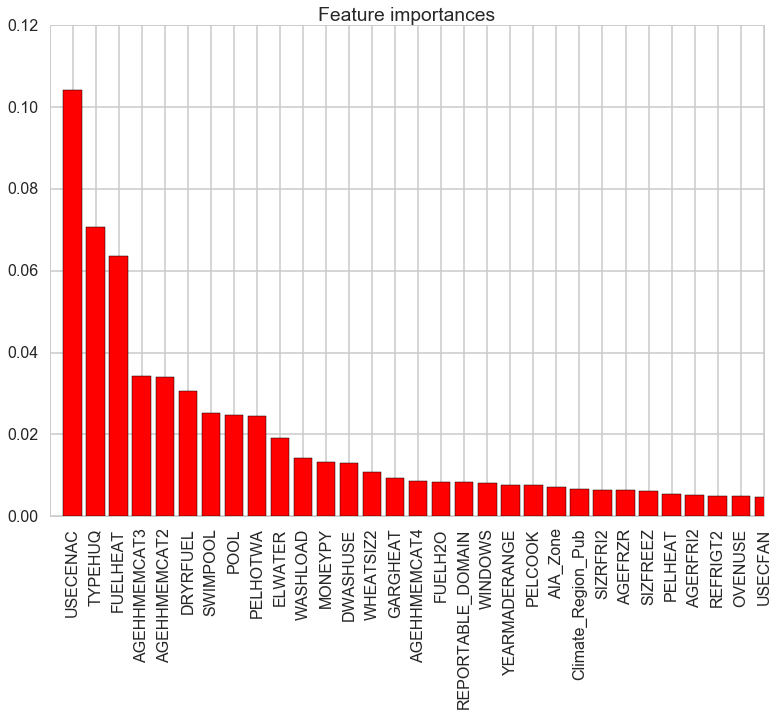

In [11]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), rfeats.name, rotation = 90)
#plt.xlim([-1, X_train.shape[1]])
plt.xlim([-1, 30])
plt.show()

### Setting up decision tree Regressor

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
RMSE = pd.DataFrame(columns = ['train','test'])
b = 35
a = linspace(1,b,b)
for i in a:
    top_feat = rfeats[:int(i)]
    X_tr = X_train.filter(items = top_feat.name)
    X_te = X_test.filter(items = top_feat.name)
    forest.fit(X_tr, y_train.KWH)#, sample_weight = nwgt_train)
    y_pred_train = forest.predict(X_tr)
    
    # Examine RMSE for fitted data
    RMSE_train = (mean_squared_error(y_train, y_pred_train, nwgt_train))**0.5
    
    # Examine RMSE for test data
    y_pred_test = forest.predict(X_te)
    RMSE_test = (mean_squared_error(y_test, y_pred_test, nwgt_test))**0.5
    
    RMSE.loc[len(RMSE)] = [RMSE_train, RMSE_test]
    print(i)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0


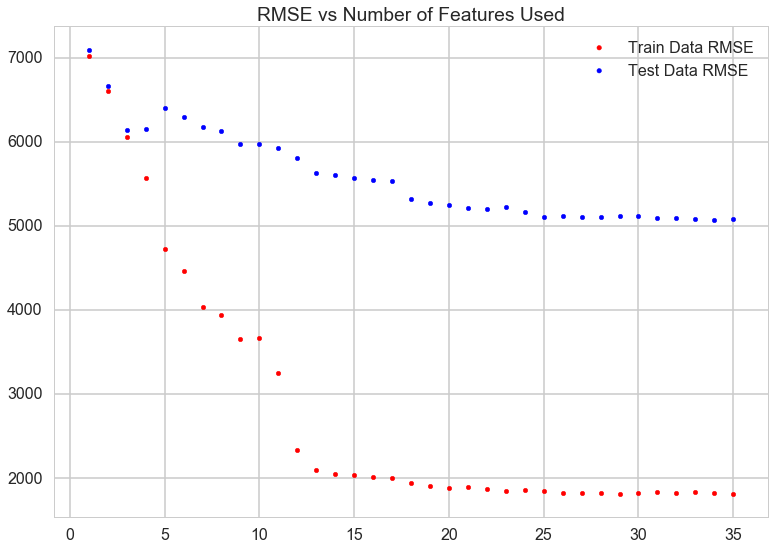

In [14]:
plt.figure()
plt.scatter(a, RMSE.train, color = 'red', label = 'Train Data RMSE')
plt.scatter(a, RMSE.test, color = 'blue', label = 'Test Data RMSE')
plt.legend()
plt.title('RMSE vs Number of Features Used')
plt.autoscale(tight = True)
plt.show()

In [15]:
rfeats[:30]

,no,imp,name
0,251.0,0.104108,USECENAC
1,3.0,0.070734,TYPEHUQ
2,190.0,0.063685,FUELHEAT
3,373.0,0.034191,AGEHHMEMCAT3
4,372.0,0.034006,AGEHHMEMCAT2
5,112.0,0.030563,DRYRFUEL
6,268.0,0.025153,SWIMPOOL
7,269.0,0.024669,POOL
8,343.0,0.024392,PELHOTWA
9,307.0,0.019158,ELWATER
